In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Dataset

In [2]:
# creating database connection 
conn = sqlite3.connect('inventory.db')

# fetch the vendor summary data (vendor_sales_summary)
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [3]:
df.to_csv('vendor_sales_summary.csv', index= False)

#  Exploratory Data Analysis
Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [4]:
# summary statistics  
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


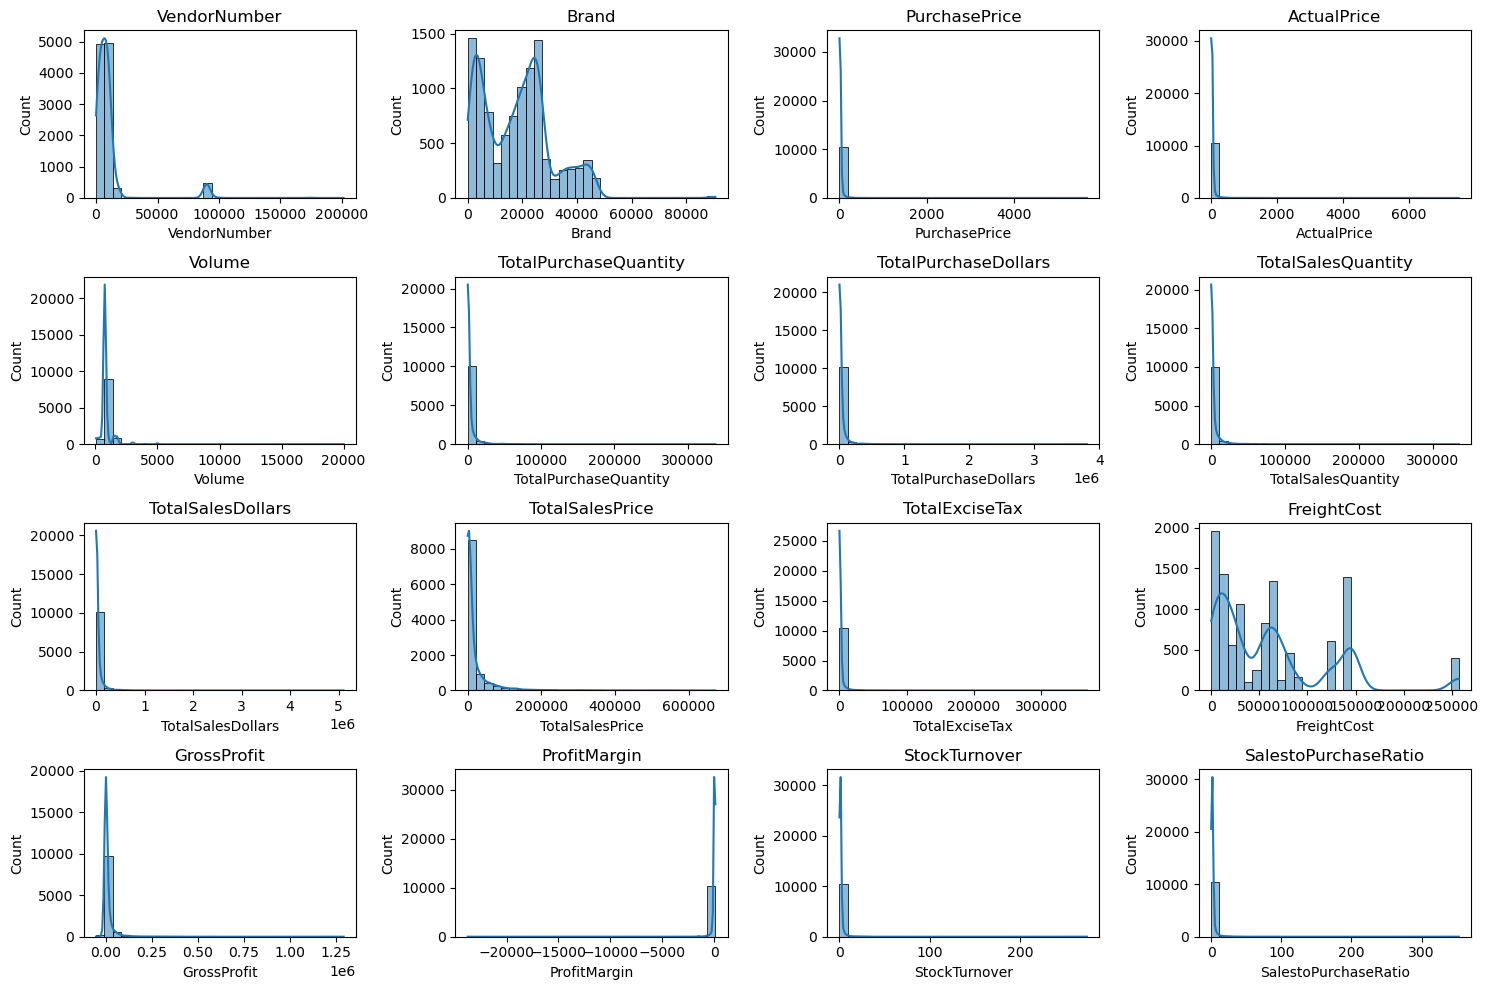

In [5]:
# Distribution Plot for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins= 30)
    plt.title(col)
plt.tight_layout()
plt.show()

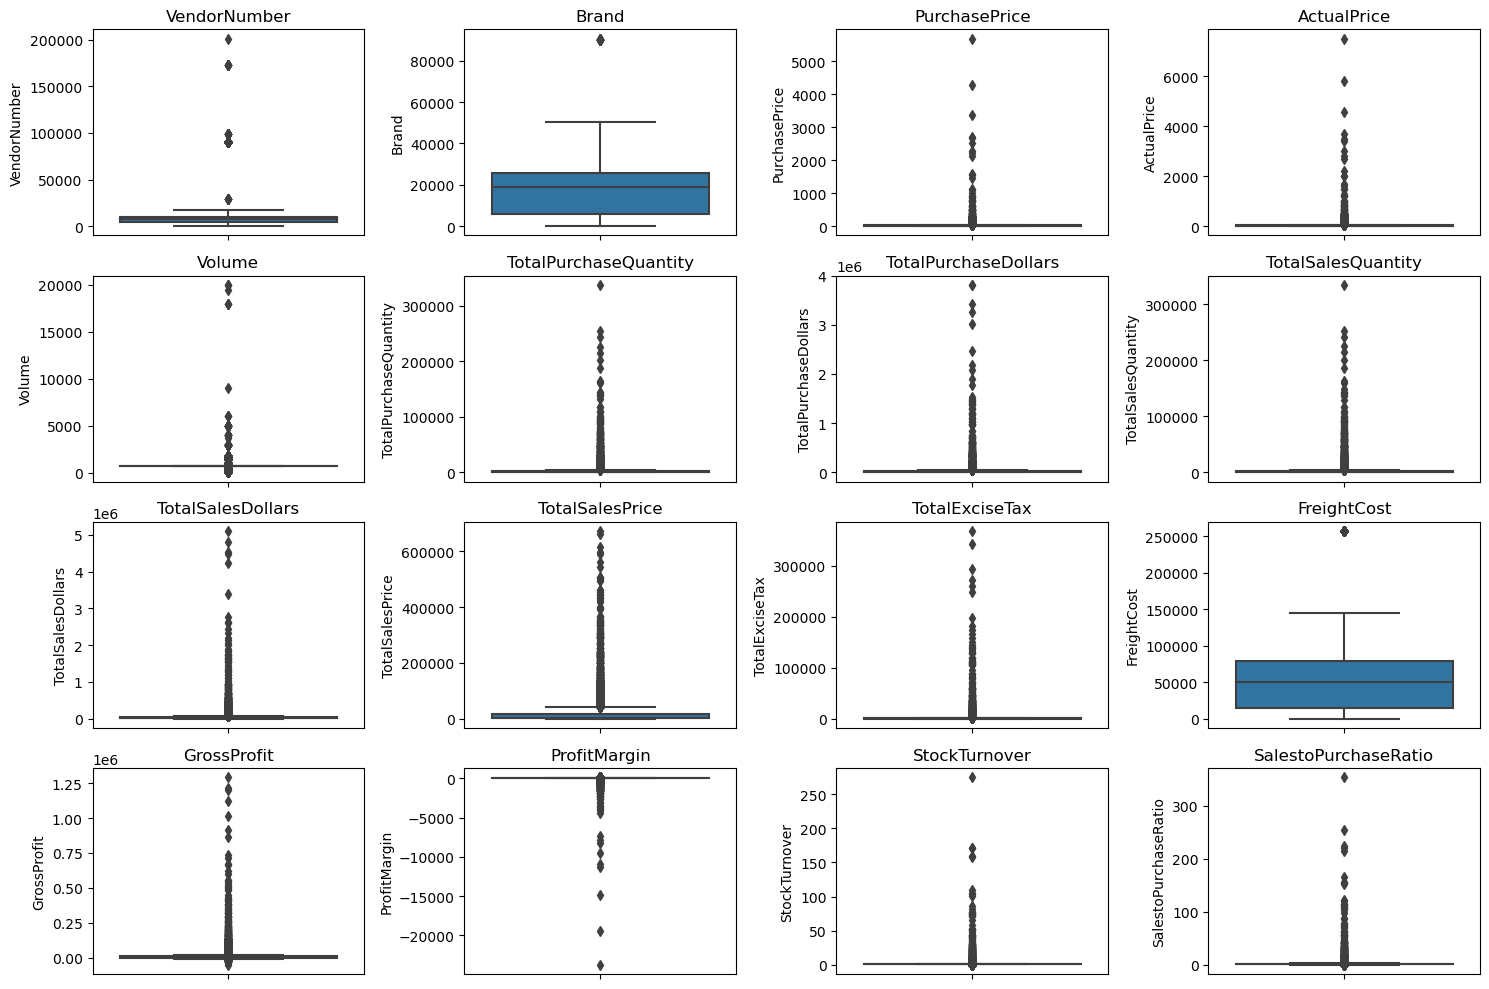

In [6]:
# outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #Adjust grid layout as needed
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights:
## Negative & Zero Values:

Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

## Outliers Indicated by High Standard Deviations:

Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [7]:
#lets filter the data by removing inconsistentencies
df = pd.read_sql_query("""
SELECT * FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
And TotalSalesQuantity > 0""", conn)

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


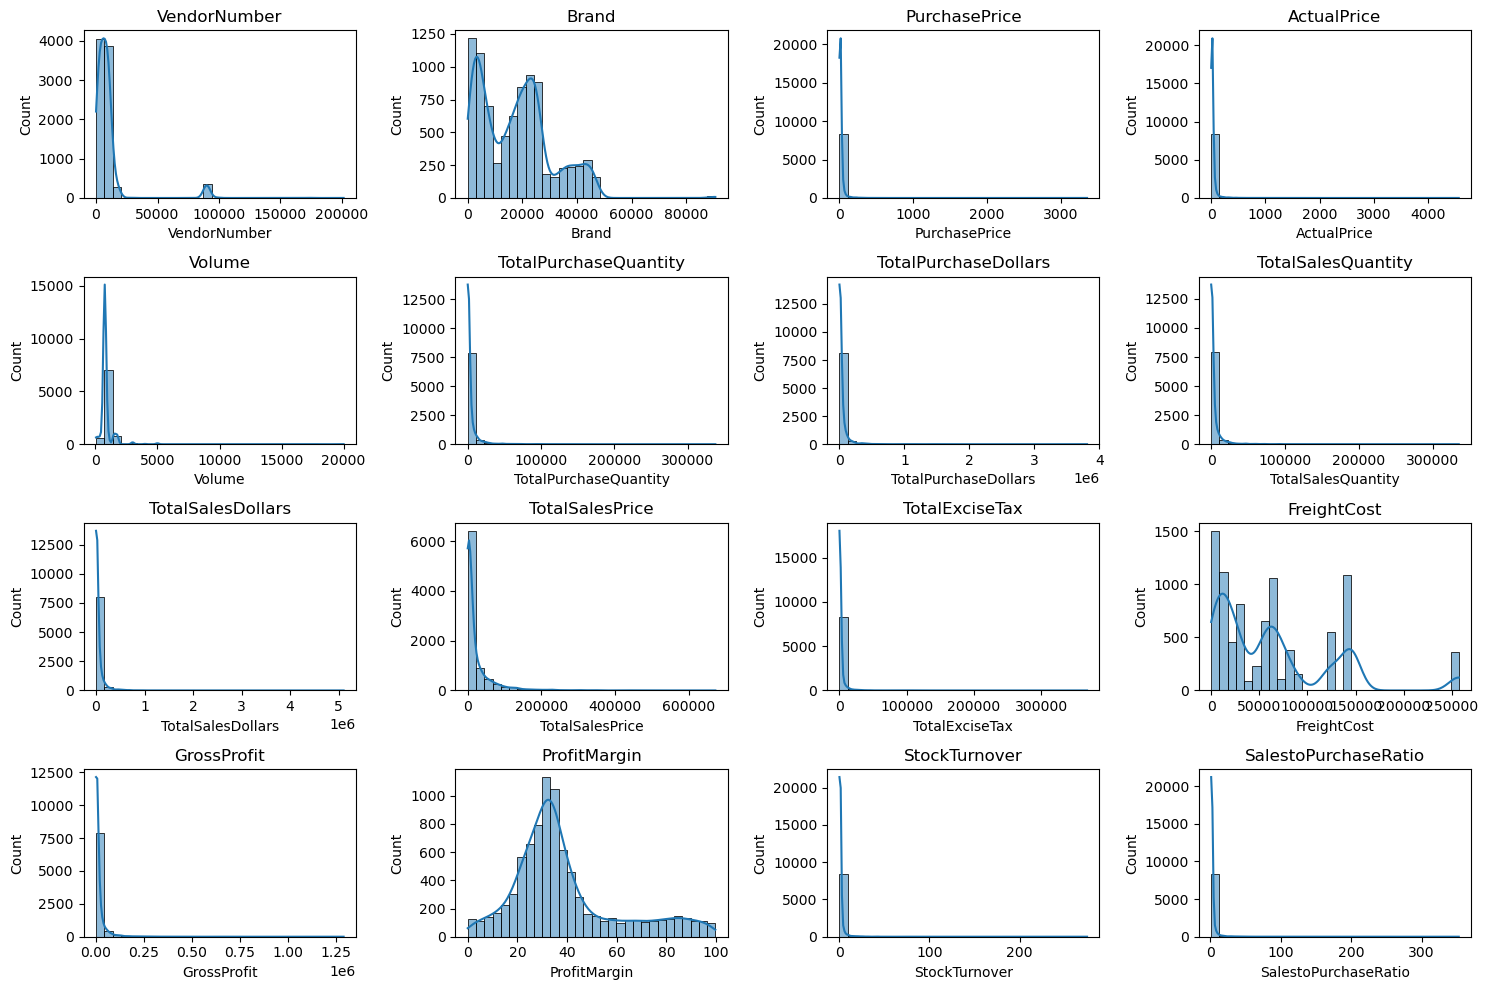

In [9]:
#Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins= 30)
    plt.title(col)
plt.tight_layout()
plt.show()

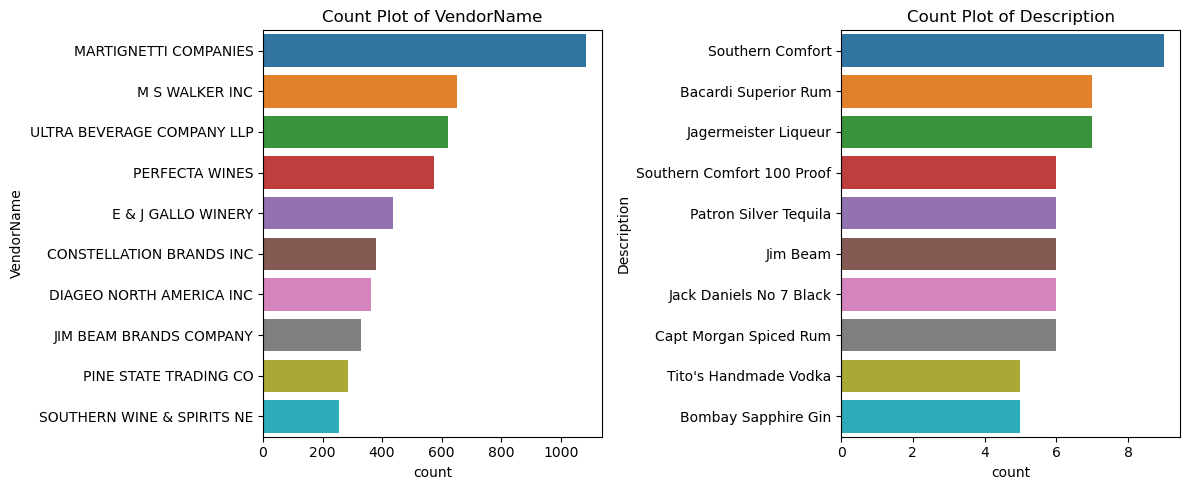

In [10]:
#count plots for Categorical Columns
categorical_cols = ['VendorName','Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)  #Adjust grid layout as needed
    sns.countplot(y =df[col],order =df[col].value_counts().index[:10])  #top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

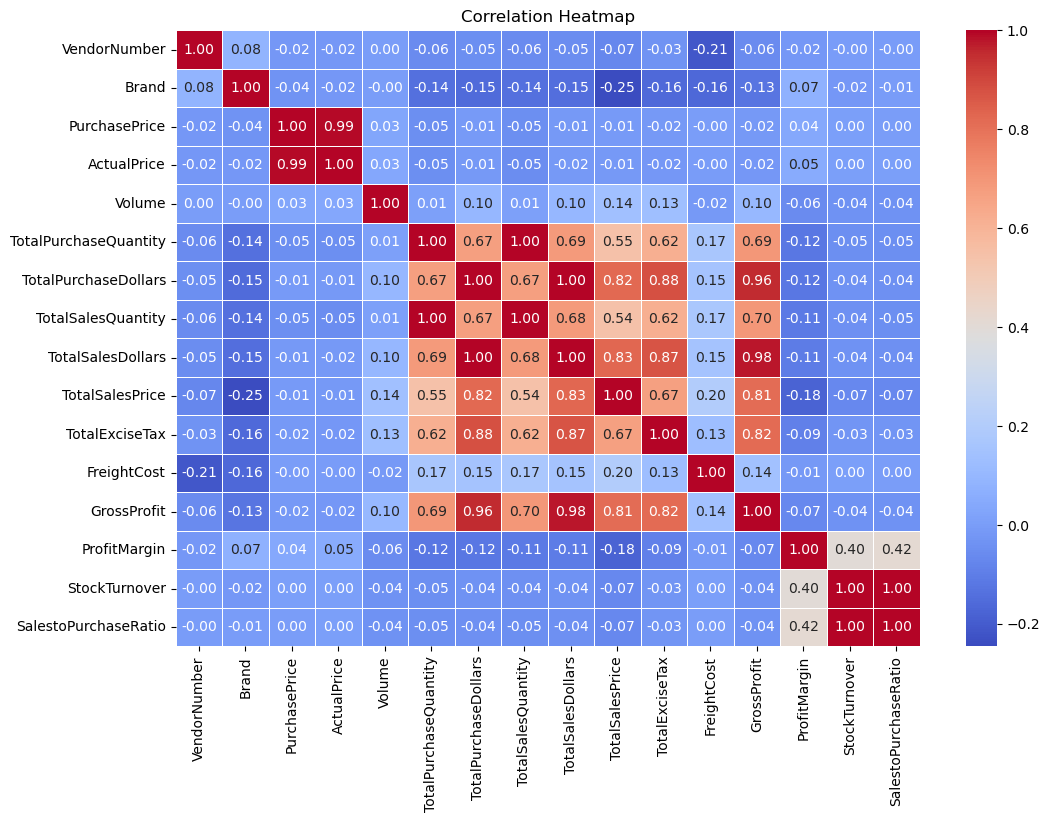

In [11]:
# correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights
PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis

identify the brands that needed Promotional or price adjustments which exhibit lower sales performance but higher profit margin

In [12]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [15]:
brand_performance.sort_values('ProfitMargin')

,Description,TotalSalesDollars,ProfitMargin
5485,Pepperjack Barossa Red,191.92,0.020842
2954,Flint & Steel Svgn Bl Napa V,119.92,0.033356
2179,Croft Tawny Porto,191.84,0.041701
2561,Douglass Hill Merlot,143.76,0.083472
5385,Parducci 13 True Grit Chard,24927.81,0.121190
...,...,...,...
4568,M Chiarlo Gavi Wh,1208.90,99.393664
657,Beniotome Sesame Shochu,4768.41,99.534226
6449,Skinnygirl Tangerine Vodka,2368.42,99.544844
2411,DiSaronno Amaretto,4781.16,99.553246


In [16]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [17]:
low_sales_threshold

560.299

In [18]:
high_margin_threshold

64.97017552750111

In [19]:
#Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] <= high_margin_threshold)
]
print("Brands with Low sales but High Prifit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low sales but High Prifit Margins:


,Description,TotalSalesDollars,ProfitMargin
6942,Terruzzi & Puthod Vernaccia,4.99,32.464930
2897,Firefly Ridge Chard,5.79,31.088083
148,Albero Sparkling Wh Organic,5.79,28.497409
6488,Smirnoff Light Strawberry,5.94,50.168350
178,Allen's Blue Curacao Liqueur,5.99,20.033389
...,...,...,...
1796,Ch de Pez 10 St Estephe Brdx,558.87,45.046254
5489,Pepperwood Grove Pnt Grigio,559.25,33.696916
1987,Clos Rochette Faiveley 09,559.72,14.264275
4224,La Fee NV Absinthe,559.72,44.847424


In [20]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]   # for better performance

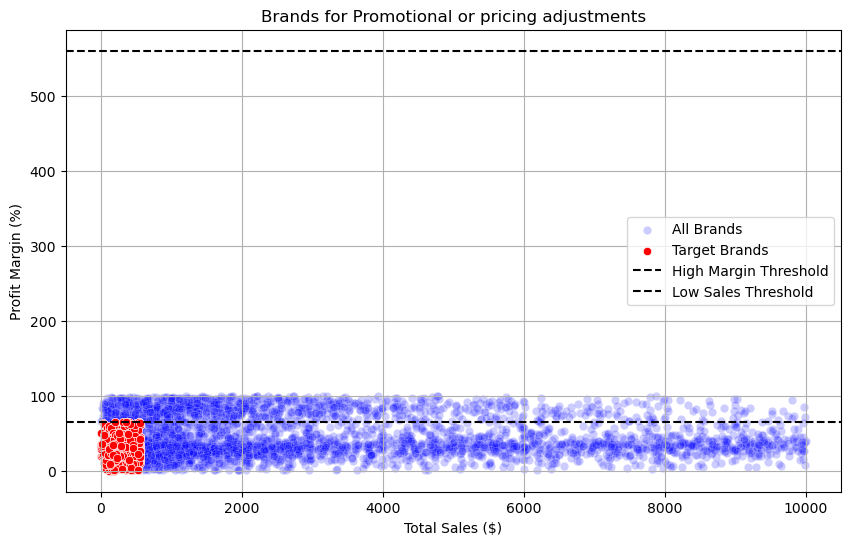

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x="TotalSalesDollars", y="ProfitMargin",color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x="TotalSalesDollars", y="ProfitMargin",color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle="--", color="black", label="High Margin Threshold")
plt.axhline(low_sales_threshold, linestyle="--", color="black", label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()

### which vendor and brands demonstrate the highest sales performance?

In [22]:
def format_dollar(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [23]:
#top vendors and brands by sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [24]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [25]:
top_brands.apply(lambda x : format_dollar(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

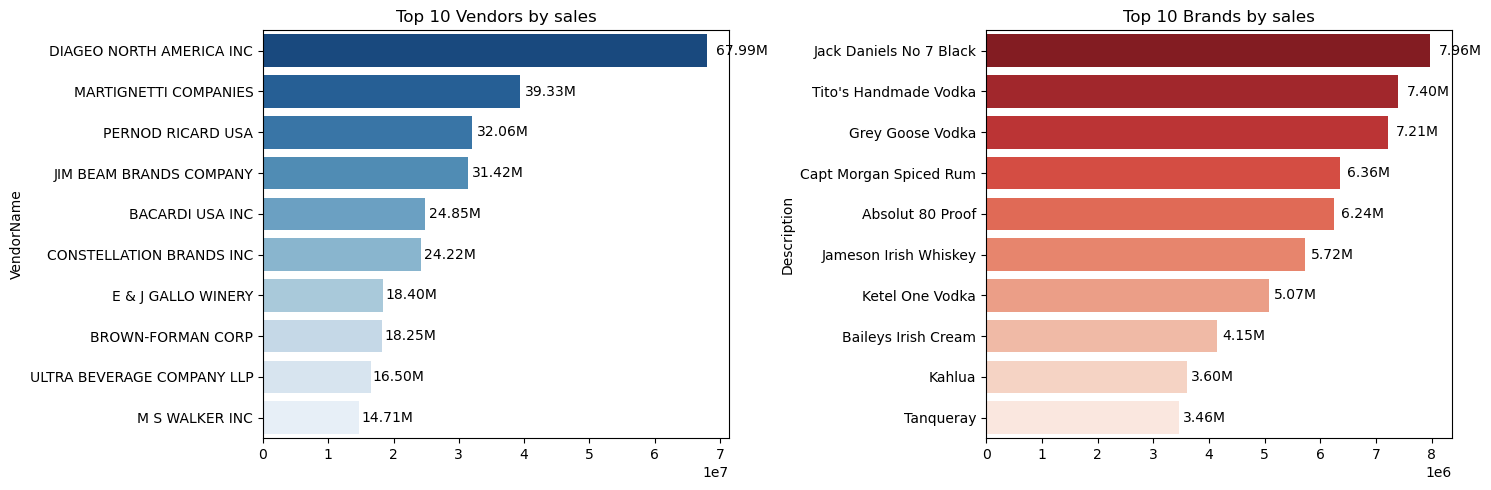

In [26]:
plt.figure(figsize=(15,5))

#plot for Top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollar(bar.get_width()),
             ha= 'left', va='center', fontsize=10,color='black')
    
# Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollar(bar.get_width()),
             ha= 'left', va='center', fontsize=10,color='black')

plt.tight_layout()
plt.show()

### Which Vendor contribute the most to total purchase dollars?

In [27]:
# Rank vendors by Total Purchase Dollars
vendor_performance = df.groupby("VendorName").agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [28]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [29]:
# calculate contribution % to overall procurement
vendor_performance['PurchaseContribution%'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100

In [30]:
# rank vendor by total purchase dollars & profitability
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [31]:
# Display top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollar)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollar)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollar)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [32]:
top_vendors['PurchaseContribution%'].sum()

65.69000000000001

In [33]:
top_vendors['Cumulative_contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


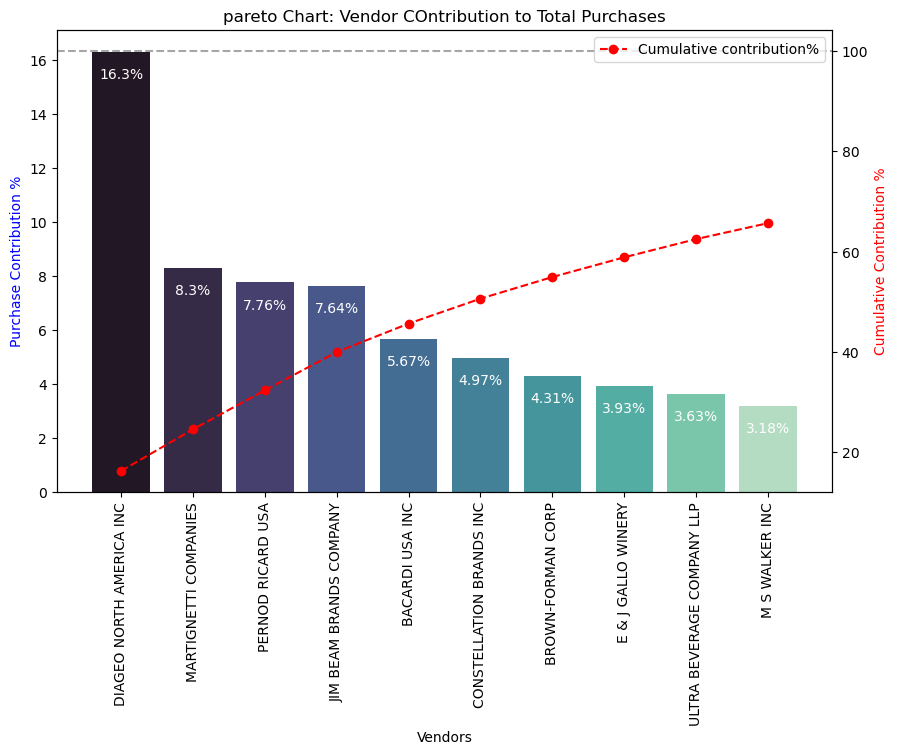

In [34]:
fig, ax1 = plt.subplots(figsize=(10,6))

#Bar plot for purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')
    
# Line plot for Cumulative contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title("pareto Chart: Vendor COntribution to Total Purchases")

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

#### How Much of total procurement is dependent on the top vendors?

In [35]:
print(f"Total purchase Contribution od top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total purchase Contribution od top 10 vendors is 65.69%


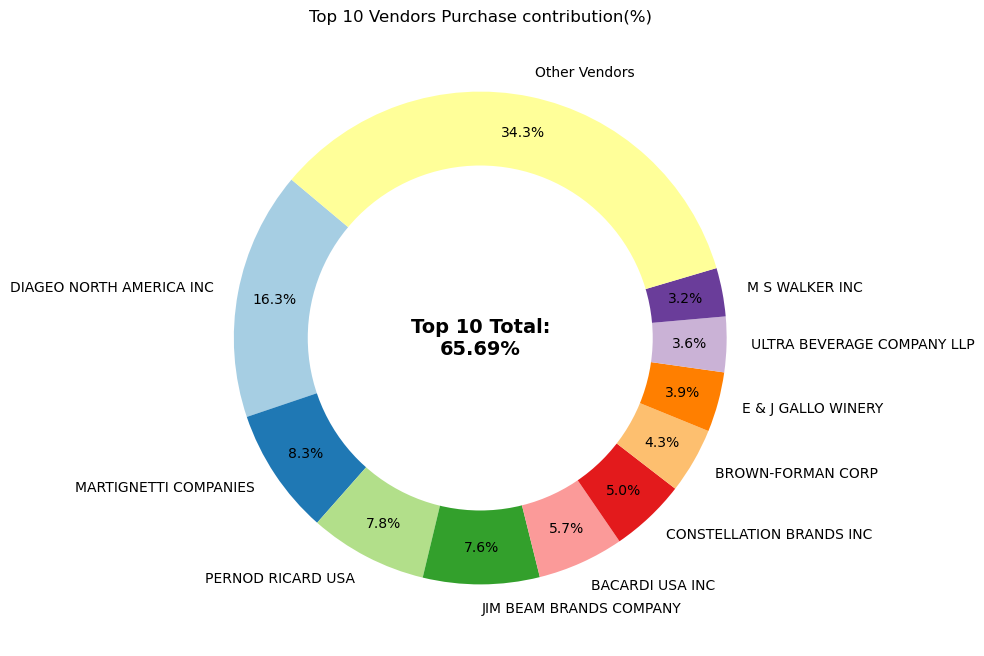

In [36]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "other vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a while circle in the center to create a "donut" effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight="bold", ha='center', va='center')

plt.title("Top 10 Vendors Purchase contribution(%)")
plt.show()


The remaining vendors contribute only 34.31% meaning they are not utiliaed effectively or may not be as competitive. If vendor dependency is too high, consider identifying new suppliers to reduse risk.

### does purchasing in bulk reduse the unit price, and what is the optional purchase volume for cost savings?


In [44]:
# calculate unit purchase price per vendor & volume group
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [37]:
# group by order sizes (e.g., small, medium, large purchase)
df["OrderSize"] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small','Medium', 'Large'])

In [38]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8560,Small,2
8561,Small,6
8562,Small,2
8563,Small,1


In [45]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio', 'OrderSize',
       'UnitPurchasePrice'],
      dtype='object')

In [46]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


In [48]:
bulk_purchase_analysis = df.groupby('OrderSize')[['UnitPurchasePrice']].mean().reset_index()
print(bulk_purchase_analysis)

  OrderSize  UnitPurchasePrice
0     Small          39.057543
1    Medium          15.486414
2     Large          10.777625


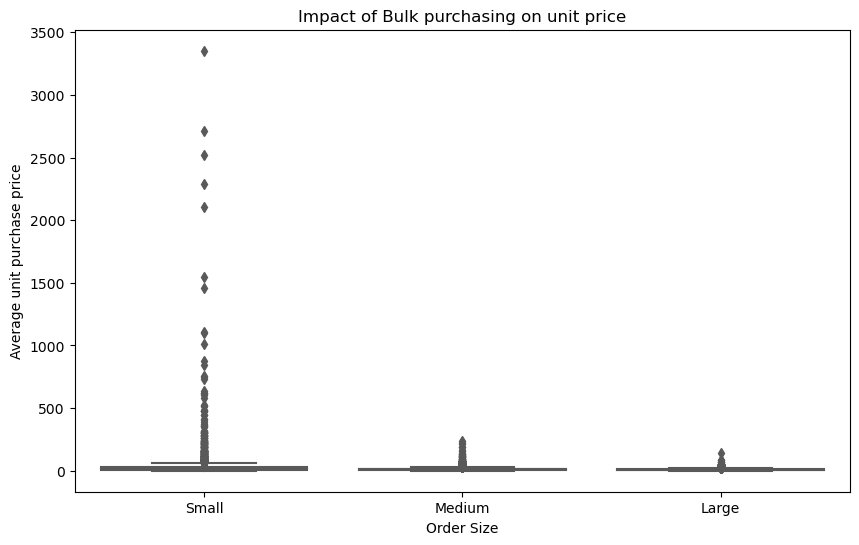

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk purchasing on unit price")
plt.xlabel("Order Size")
plt.ylabel("Average unit purchase price")
plt.show()

Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### which vendors have low inventory turnover, indicating exess stock and slow-moving product?


In [50]:
#Identify low inventory turnover vendors
low_turnover_vendors = df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().reset_index()

# sort by lower turnover
low_turnover_vendors = low_turnover_vendors.sort_values('StockTurnover',ascending = True)
low_turnover_vendors.head(10)

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
60,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
15,CENTEUR IMPORTS LLC,0.773953
78,SMOKY QUARTZ DISTILLERY LLC,0.783835
90,TAMWORTH DISTILLING,0.797078
91,THE IMPORTED GRAPE LLC,0.807569
101,WALPOLE MTN VIEW WINERY,0.820548


Slow-moving inventory increases holding costs (warehouse rent, insurance, depreciation)

Identifying vendors with low inventory turnover is critical for business efficiency, cost reduction, and profitability

### How much captial is locked in unsold inventory per vendor, and which vendors contribute the most to it?


In [51]:
# calculate unsold inventory value
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollar(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [52]:
# Aggregate Capital locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#sort vendors with the highest locked captial
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollar)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


### what is the 95% confidence intervals for profit margins of top performance and low performance vendors

In [53]:
# Define top and low vendors based on Total Sales Dollars (Top 25% & Bottom 25%)
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)
low_threshold

1349.8500000000001

In [54]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df["TotalSalesDollars"] >= low_threshold]['ProfitMargin'].dropna()

In [55]:
low_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
8479    99.089399
8504    99.544844
8514    99.348356
8516    99.604734
8524    99.716657
Name: ProfitMargin, Length: 6424, dtype: float64

In [56]:
# Function to compute confidence interval
def confidence_interval(data,confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))   # standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (37.29, 38.26), Mean: 37.77


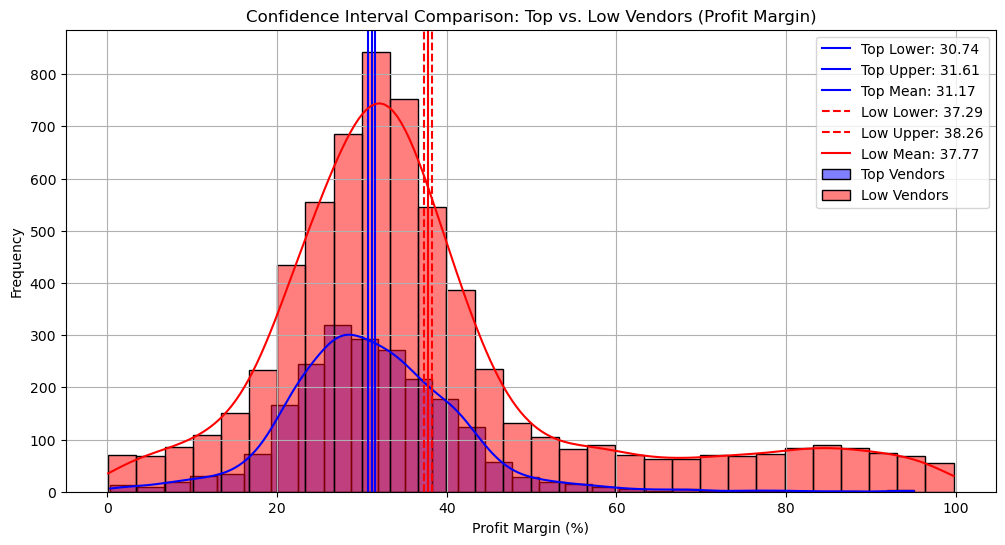

In [57]:
# compute confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")


plt.figure(figsize=(12, 6))

#Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="-", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="-", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [58]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df["TotalSalesDollars"] >= low_threshold]['ProfitMargin'].dropna()

# preform two sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# print results
print(f"T-Statistics: {t_stat:.4f}  p-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margin between top and low performing vendors")
else:
    print("fail ti reject H0 : No significant difference in profit margin.")

T-Statistics: -19.8387  p-Value: 0.0000
Reject H0: There is a significant difference in profit margin between top and low performing vendors


A p-value this small suggests that the difference is not just statistically significant but also practically meaningful.

The two vendor groups operate very differently in terms of profitability.

In [59]:
# Use this script to save csv files into database with their filename as tablename
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename="logs/ingestion_db.log", 
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s", 
    filemode="a"  
)

engine = create_engine('sqlite:///inventory.db')

def ingest_db(df, table_name, engine):
    '''this function will ingest the dataframe into database table'''
    df.to_sql(table_name, con = engine, if_exists = 'replace', index = False)
    
def load_raw_data():
    '''this function will load the CSVs as dataframe and ingest into db'''
    start = time.time()
    for file in os.listdir('data'):
        if '.csv' in file:
            df = pd.read_csv('data/'+file)
            logging.info(f'Ingesting {file} in db')
            ingest_db(df, file[:-4], engine)
    end = time.time()
    total_time = (end - start)/60
    logging.info('--------------Ingestion Complete------------')
    
    logging.info(f'\nTotal Time Taken: {total_time} minutes')

if __name__ == '__main__':
    load_raw_data()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

C:\Users\Nikhi


None
